In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/칼럼만.csv', encoding = 'cp949')
df

,주소
0,서울특별시 영등포구 경인로 878
1,서울특별시 영등포구 경인로 878
2,서울특별시 영등포구 경인로 878
3,서울특별시 영등포구 경인로 878
4,서울특별시 영등포구 경인로 878
...,...
638697,서울특별시 중구 퇴계로 140
638698,서울특별시 중구 퇴계로 140
638699,서울특별시 중구 퇴계로 140
638700,서울특별시 중구 퇴계로 140


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


주소 칼럼을 이용하여 위도 경도 칼럼 추가

In [3]:
df = df.drop_duplicates(['주소'], keep='first')
df.to_csv('주소칼럼_위도경도_중복치처리.csv', index = False, encoding='utf-8-sig')

In [4]:
df_gps = pd.read_excel('/content/drive/MyDrive/주소칼럼_위도경도_중복치처리.xlsx')
df_gps

,주소,Latitude,Longitude
0,서울특별시 영등포구 경인로 878,37.517129,126.910236
1,경기도 하남시 감북로 80,37.511792,127.167343
2,서울특별시 강동구 구천면로 395(명일동),37.551015,127.142892
3,서울특별시 송파구 마천동 성내천로37길 37,37.499027,127.159071
4,서울특별시 송파구 신천동 29-5 송파구청 앞,37.514571,127.106070
...,...,...,...
606,서울특별시 성북구 아리랑로5길 85,37.597437,127.010054
607,"서울특별시 강북구 월계로 173 (번동, 북서울꿈의숲)",37.621431,127.040625
608,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",37.608331,127.028785
609,"서울특별시 강북구 삼각산로 85 (수유동, 강북문화예술회관)",37.640776,127.013158


In [5]:
df = pd.read_csv('/content/drive/MyDrive/한국전력공사_서울시 전기차 충전소 충전량_20220331.csv')
df

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46
3,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,24.77,0,38,2021-01-04 12:12:02,2021-01-04 12:51:01
4,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,19.21,0,29,2021-01-04 22:51:11,2021-01-04 23:21:04
...,...,...,...,...,...,...,...,...,...
638697,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,41.67,1,21,2022-03-31 09:44:33,2022-03-31 11:05:57
638698,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,29.07,0,44,2022-03-31 12:17:56,2022-03-31 13:02:54
638699,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,55.65,1,21,2022-03-31 16:57:11,2022-03-31 18:19:04
638700,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,21.48,1,3,2022-03-31 13:06:18,2022-03-31 14:09:20


In [6]:
df = pd.merge(df, df_gps, how='outer', on='주소')

데이터 전처리

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638702 entries, 0 to 638701
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   충전구분       638702 non-null  object 
 1   충전소명       638702 non-null  object 
 2   주소         638702 non-null  object 
 3   충전기용량      631208 non-null  float64
 4   충전량        638702 non-null  float64
 5   충전시간       638702 non-null  int64  
 6   충전분        638702 non-null  int64  
 7   충전시작시각     638702 non-null  object 
 8   충전종료시각     638702 non-null  object 
 9   Latitude   638702 non-null  float64
 10  Longitude  638702 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 58.5+ MB


In [8]:
#결측치 확인
df[(df['충전기용량']!=50) & (df['충전기용량']!=7)]

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,Latitude,Longitude
103414,급속,송파도서관,"서울특별시 송파구 동남로 263 (오금동, 송파도서관)",NaN,14.60,0,47,2022-02-18 15:08:57,2022-02-18 15:55:58,37.499950,127.134794
103415,급속,송파도서관,"서울특별시 송파구 동남로 263 (오금동, 송파도서관)",NaN,5.31,0,41,2022-02-18 15:59:02,2022-02-18 16:40:02,37.499950,127.134794
103416,급속,송파도서관,"서울특별시 송파구 동남로 263 (오금동, 송파도서관)",NaN,17.51,0,40,2022-02-21 13:09:23,2022-02-21 13:49:48,37.499950,127.134794
103417,급속,송파도서관,"서울특별시 송파구 동남로 263 (오금동, 송파도서관)",NaN,10.74,0,26,2022-02-26 12:59:45,2022-02-26 13:26:08,37.499950,127.134794
103418,급속,송파도서관,"서울특별시 송파구 동남로 263 (오금동, 송파도서관)",NaN,29.38,0,34,2022-02-26 10:00:00,2022-02-26 10:34:42,37.499950,127.134794
...,...,...,...,...,...,...,...,...,...,...,...
637523,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",NaN,17.00,0,51,2022-03-28 13:07:53,2022-03-28 13:59:48,37.608331,127.028785
637524,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",NaN,16.70,0,27,2022-03-28 13:09:48,2022-03-28 13:37:47,37.608331,127.028785
637525,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",NaN,18.70,0,38,2022-03-29 13:40:35,2022-03-29 14:18:47,37.608331,127.028785
637526,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",NaN,9.01,0,35,2022-03-31 20:14:52,2022-03-31 20:50:34,37.608331,127.028785


In [9]:
#충전기용량 결측치 채우기
for i in range(0,len(df)):
  if df['충전구분'][i] == '급속':
    df['충전기용량'][i] = 50
  else:
    df['충전기용량'][i] = 7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#문자열을 시간으로 바꾸기
df['충전시작시각'] = pd.to_datetime(df['충전시작시각'], format = '%Y-%m-%d %H:%M:%S')
df['충전종료시각'] = pd.to_datetime(df['충전종료시각'], format = '%Y-%m-%d %H:%M:%S')

In [11]:
#충전시간(총) 칼럼 만들기
# for i in range(0,len(df),1):
#   df['충전시간'][i] = df['충전시간'][i].astype(str).zfill(2)
#   df['충전분'][i] = df['충전분'][i].astype(str).zfill(2)
df['총충전시간(분)'] = df['충전시간']*60 + df['충전분']

In [12]:
#충전시각 세부칼럼 생성
df['충전시작년도'] = df['충전시작시각'].dt.year
df['충전시작월'] = df['충전시작시각'].dt.month
df['충전시작일'] = df['충전시작시각'].dt.day
df['충전시작시각(시간)'] = df['충전시작시각'].dt.hour
df['충전종료시각(시간)'] = df['충전종료시각'].dt.hour

In [13]:
import numpy as np
q1, q3 = np.percentile(df['충전량'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (iqr * 1.5)
lower_bound = q1 - (iqr * 1.5)
df[(df['충전량']> upper_bound) | (df['충전량'] < lower_bound)]

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,Latitude,Longitude,총충전시간(분),충전시작년도,충전시작월,충전시작일,충전시작시각(시간),충전종료시각(시간)
42,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,82.78,2,0,2021-01-21 07:43:34,2021-01-21 09:44:29,37.517129,126.910236,120,2021,1,21,7,9
81,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,88.56,2,8,2021-02-10 07:23:24,2021-02-10 09:32:13,37.517129,126.910236,128,2021,2,10,7,9
104,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,83.98,2,3,2021-02-18 09:34:04,2021-02-18 11:37:25,37.517129,126.910236,123,2021,2,18,9,11
128,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,87.08,2,35,2021-02-28 20:36:38,2021-02-28 23:12:19,37.517129,126.910236,155,2021,2,28,20,23
186,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,76.48,1,52,2021-03-19 15:45:42,2021-03-19 17:37:57,37.517129,126.910236,112,2021,3,19,15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636577,급속,북서울꿈의숲,"서울특별시 강북구 월계로 173 (번동, 북서울꿈의숲)",50.0,71.73,1,37,2021-09-25 08:45:07,2021-09-25 10:22:59,37.621431,127.040625,97,2021,9,25,8,10
637318,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",50.0,72.34,1,49,2022-01-08 12:45:42,2022-01-08 14:35:06,37.608331,127.028785,109,2022,1,8,12,14
637870,완속,서울전력관리처,서울특별시 중구 퇴계로 140,7.0,69.99,10,51,2021-03-10 09:23:38,2021-03-10 20:15:07,37.560597,126.987406,651,2021,3,10,9,20
638065,완속,서울전력관리처,서울특별시 중구 퇴계로 140,7.0,70.32,10,27,2021-05-10 16:52:52,2021-05-11 03:20:05,37.560597,126.987406,627,2021,5,10,16,3


In [15]:
#주소(구) 칼럼 추가

for i in range(len(df)):
  df['주소(구)'][i] = df['주소'][i].split(' ')[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
#이상치 있는 컬럼 확인
df[df['충전소명'] == '강변테크노마트 주차장'].sort_values(by = '충전시간', ascending=False).head(1)


,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,Latitude,Longitude,총충전시간(분),충전시작년도,충전시작월,충전시작일,충전시작시각(시간),충전종료시각(시간),주소(구)
405034,급속,강변테크노마트 주차장,"서울특별시 광진구 광나루로56길 85 (구의동, 테크노-마트21)",50.0,20.6,66438,30,2014-05-03 10:13:33,2021-11-30 16:43:51,37.534937,127.095709,3986310,2014,5,3,10,16,광진구


In [17]:
#이상치 제거
df = df.drop([df.index[336331], df.index[231941], df.index[405034]])
df.reset_index(drop = True, inplace = True)

구별 인구통계

In [53]:
#데이터 불러들이고 구별로 통합
df_seoul = pd.read_excel('/content/drive/MyDrive/seoul_data.xlsx')
df_seoul = df_seoul.groupby(['gu'], as_index=False).sum()
df_seoul.rename(columns={'gu':'주소(구)'},inplace = True)
df_seoul

,주소(구),vehicle,ele_num
0,강남구,266030,15962
1,강동구,230620,13836
2,강북구,148474,8908
3,강서구,286328,17180
4,관악구,243185,14595
5,광진구,170201,10212
6,구로구,197782,11868
7,금천구,115577,6935
8,노원구,254834,15290
9,도봉구,157765,9467


In [54]:
#전기차 충전소 데이터랑 합치기
df = pd.merge(df, df_seoul, how='outer', on='주소(구)')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638699 entries, 0 to 638698
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   충전구분        638699 non-null  object        
 1   충전소명        638699 non-null  object        
 2   주소          638699 non-null  object        
 3   충전기용량       638699 non-null  float64       
 4   충전량         638699 non-null  float64       
 5   충전시간        638699 non-null  int64         
 6   충전분         638699 non-null  int64         
 7   충전시작시각      638699 non-null  datetime64[ns]
 8   충전종료시각      638699 non-null  datetime64[ns]
 9   Latitude    638699 non-null  float64       
 10  Longitude   638699 non-null  float64       
 11  총충전시간(분)    638699 non-null  int64         
 12  충전시작년도      638699 non-null  int64         
 13  충전시작월       638699 non-null  int64         
 14  충전시작일       638699 non-null  int64         
 15  충전시작시각(시간)  638699 non-null  int64         
 16  충전

In [56]:
# 서울 외에 경기도 충전소가 존재함 - 열 제거
df[df['vehicle'].isnull()]
df = df.dropna(axis = 0)

In [113]:
df

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,Latitude,...,총충전시간(분),충전시작년도,충전시작월,충전시작일,충전시작시각(시간),충전종료시각(시간),주소(구),vehicle,ele_num,충전시작시각(월)
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,37.517129,...,0,2021,1,1,2,2,영등포구,188237.0,11295.0,2101
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,37.517129,...,29,2021,1,2,14,15,영등포구,188237.0,11295.0,2101
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46,37.517129,...,93,2021,1,2,20,22,영등포구,188237.0,11295.0,2101
3,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,24.77,0,38,2021-01-04 12:12:02,2021-01-04 12:51:01,37.517129,...,38,2021,1,4,12,12,영등포구,188237.0,11295.0,2101
4,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,19.21,0,29,2021-01-04 22:51:11,2021-01-04 23:21:04,37.517129,...,29,2021,1,4,22,23,영등포구,188237.0,11295.0,2101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638694,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",50.0,17.00,0,51,2022-03-28 13:07:53,2022-03-28 13:59:48,37.608331,...,51,2022,3,28,13,13,성북구,216671.0,13000.0,0
638695,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",50.0,16.70,0,27,2022-03-28 13:09:48,2022-03-28 13:37:47,37.608331,...,27,2022,3,28,13,13,성북구,216671.0,13000.0,0
638696,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",50.0,18.70,0,38,2022-03-29 13:40:35,2022-03-29 14:18:47,37.608331,...,38,2022,3,29,13,14,성북구,216671.0,13000.0,0
638697,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",50.0,9.01,0,35,2022-03-31 20:14:52,2022-03-31 20:50:34,37.608331,...,35,2022,3,31,20,20,성북구,216671.0,13000.0,0


In [61]:
df.to_csv('전기차_충전소_데이터_0531_11시30분.csv')

In [20]:
#폰트 설치
import matplotlib.font_manager as fm 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

!apt-get update -qq
!apt-get install fonts-nanum* -qq
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


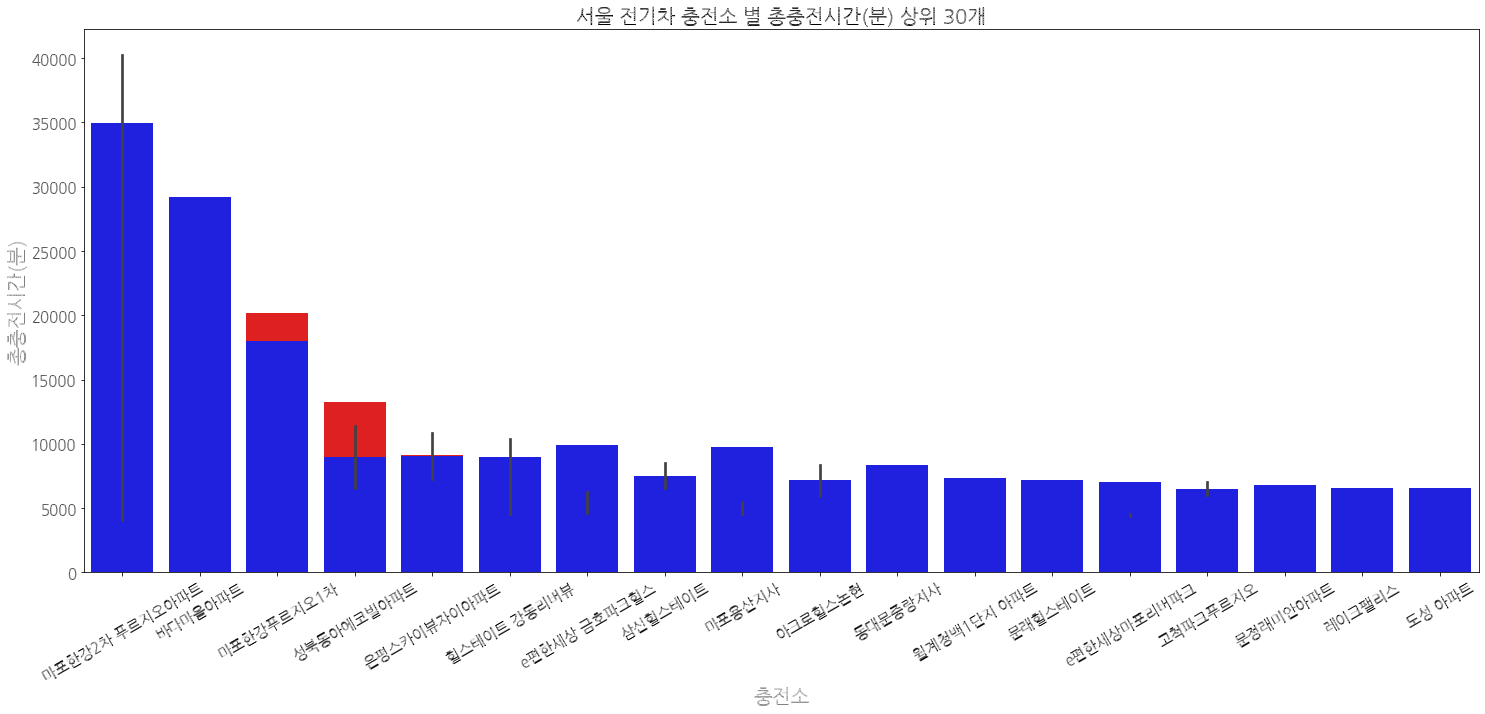

In [105]:
### 서울 전기차 충전소 별 충전시간(상위 30개)
df_gup_top30 = df[df['충전구분']=='급속'].sort_values(by='총충전시간(분)', ascending=False).head(30)
df_wan_top30 = df[df['충전구분']=='완속'].sort_values(by='총충전시간(분)', ascending=False).head(30)
fig = plt.figure(figsize=(25,10))
s1 = sns.barplot(x='충전소명',y='총충전시간(분)',data=df_gup_top30, color='red')
s2 = sns.barplot(x='충전소명',y='총충전시간(분)',data=df_wan_top30, color='blue')
plt.yticks(fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.ylabel('총충전시간(분)', rotation=90, fontsize=20, color='gray')
plt.xlabel('충전소', fontsize=20, color='gray')
plt.title('서울 전기차 충전소 별 총충전시간(분) 상위 30개', fontsize=20, color='black')
plt.show()

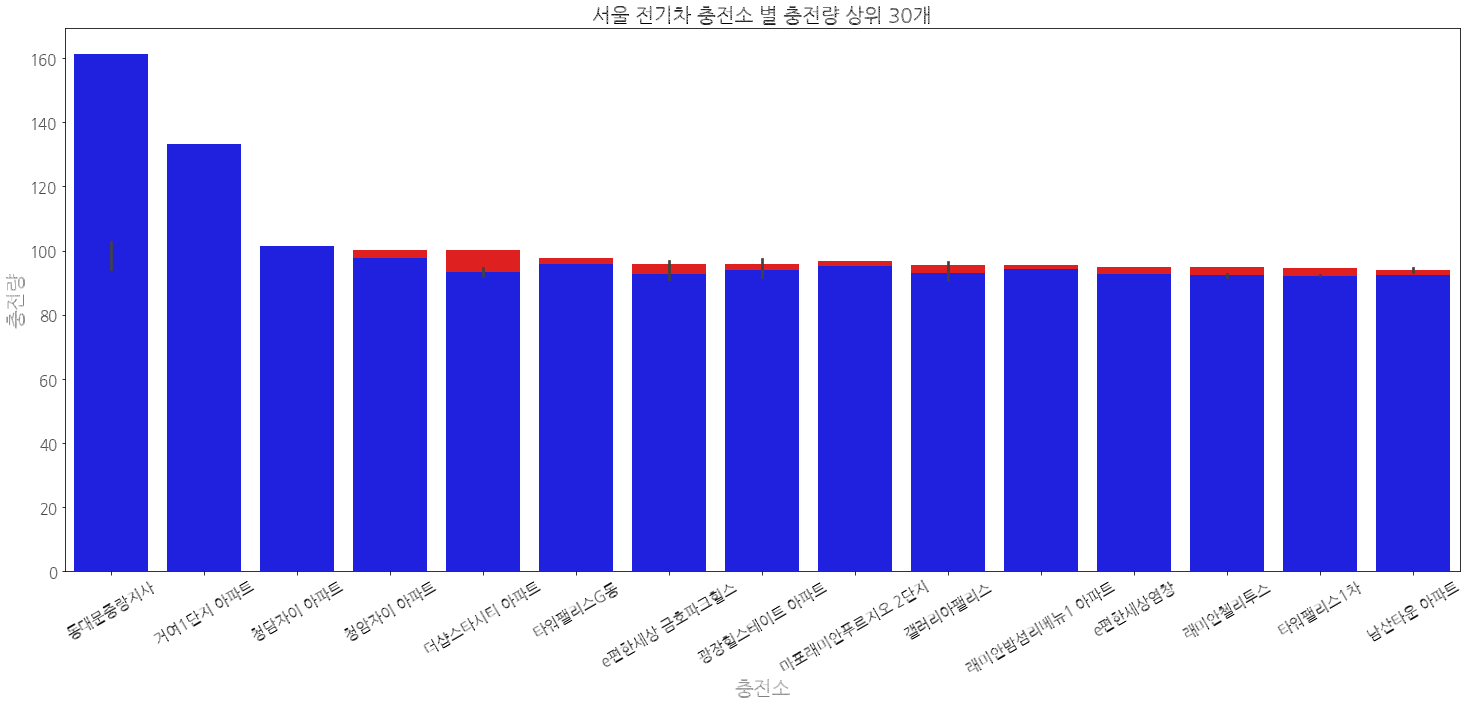

In [107]:
### 서울 전기차 충전소 별 충전량(상위 30개)
df_gup_top30 = df[df['충전구분']=='급속'].sort_values(by='충전량', ascending=False).head(30)
df_wan_top30 = df[df['충전구분']=='완속'].sort_values(by='충전량', ascending=False).head(30)
fig = plt.figure(figsize=(25,10))
s1 = sns.barplot(x='충전소명',y='충전량',data=df_gup_top30, color='red')
s2 = sns.barplot(x='충전소명',y='충전량',data=df_wan_top30, color='blue')
plt.yticks(fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.ylabel('충전량', rotation=90, fontsize=20, color='gray')
plt.xlabel('충전소', fontsize=20, color='gray')
plt.title('서울 전기차 충전소 별 충전량 상위 30개', fontsize=20, color='black')
plt.show()

In [73]:
#이용량이 가장 많은 충전소 상위 50개(급속 = 빨강, 완속 = 파랑) 
df_top30 = df.sort_values(by='충전량', ascending=False).head(200)
import folium
import json
df_top30_map = folium.Map(
    location = [37.573030, 126.979189], tiles = 'openstreetmap',zoom_start = 11
)
for idx in df_top30.index : 
  lat = df_top30.loc[idx, 'Latitude']
  lng = df_top30.loc[idx, 'Longitude']
  ctype = df.loc[idx, '충전구분']


  fillcolor = ''
  if ctype == '급속':
    fillColor= 'red'
    size = 5
  elif ctype == '완속':
    fillColor= 'blue'
    size = 5

  folium.CircleMarker(
      location = [lat,lng], color = fillColor, fill=True, fill_color = fillColor, fill_opaciy = 1, weight = 1, radius = size
  ).add_to(df_top30_map)
df_top30_map

In [74]:
#이용량이 가장 적은 충전소 하위 100개(급속 = 빨강, 완속 = 파랑) 
df_bot30 = df.sort_values(by='충전량', ascending=False).tail(200)
import folium
import json
df_bot30_map = folium.Map(
    location = [37.573030, 126.979189], tiles = 'openstreetmap',zoom_start = 11
)
for idx in df_bot30.index : 
  lat = df_bot30.loc[idx, 'Latitude']
  lng = df_bot30.loc[idx, 'Longitude']
  ctype = df.loc[idx, '충전구분']


  fillcolor = ''
  if ctype == '급속':
    fillColor= 'red'
    size = 5
  elif ctype == '완속':
    fillColor= 'blue'
    size = 5

  folium.CircleMarker(
      location = [lat,lng], color = fillColor, fill=True, fill_color = fillColor, fill_opaciy = 1, weight = 1, radius = size
  ).add_to(df_bot30_map)
df_bot30_map

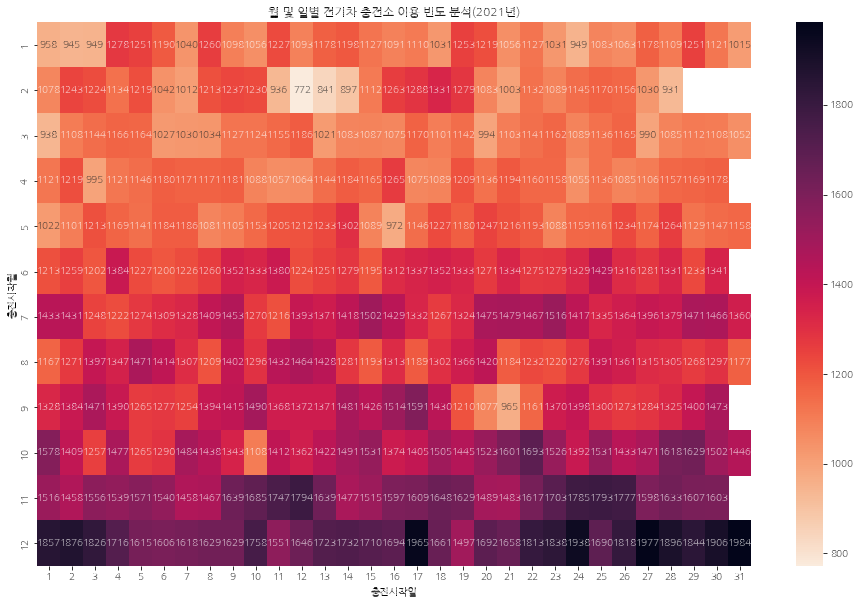

In [66]:
### 월 및 일별 전기차 충전소 이용 빈도(2021년) 
df_monthday_2021 = df[df['충전시작년도'] == 2021]
df_monthday_2021_pivot = df_monthday_2021.pivot_table(values = '충전소명', index = '충전시작월', columns = '충전시작일', aggfunc = 'count')
plt.figure(figsize = (16,10))
sns.heatmap(df_monthday_2021_pivot, annot=True, fmt = ".0f", cmap = 'rocket_r')
plt.title('월 및 일별 전기차 충전소 이용 빈도 분석(2021년)')
plt.show()

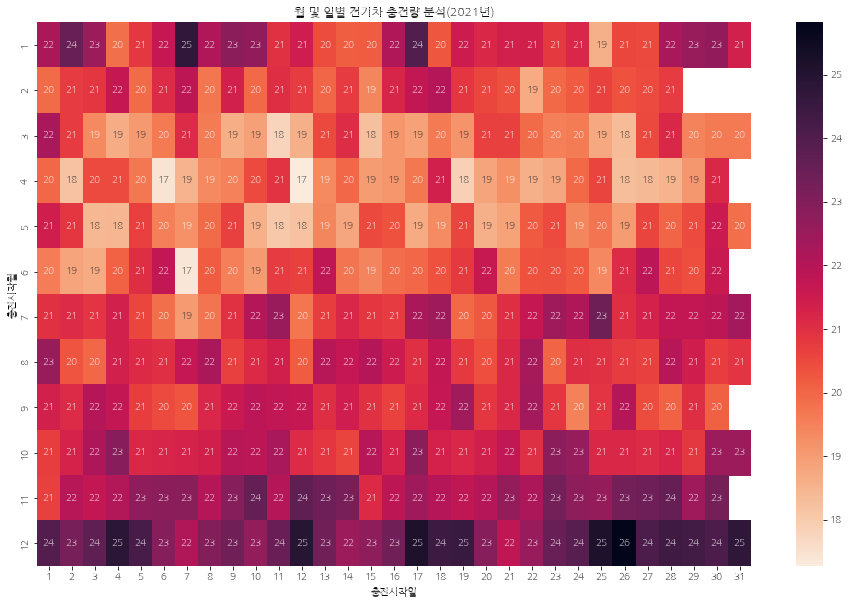

In [67]:
### 월 및 일별 전기차 충전량(2021년)
df_monthday_2021 = df[df['충전시작년도'] == 2021]
df_monthday_2021_pivot = df_monthday_2021.pivot_table(values = '충전량', index = '충전시작월', columns = '충전시작일', aggfunc = 'mean')
plt.figure(figsize = (16,10))
sns.heatmap(df_monthday_2021_pivot, annot=True, fmt = ".0f", cmap = 'rocket_r')
plt.title('월 및 일별 전기차 충전량 분석(2021년)')
plt.show()

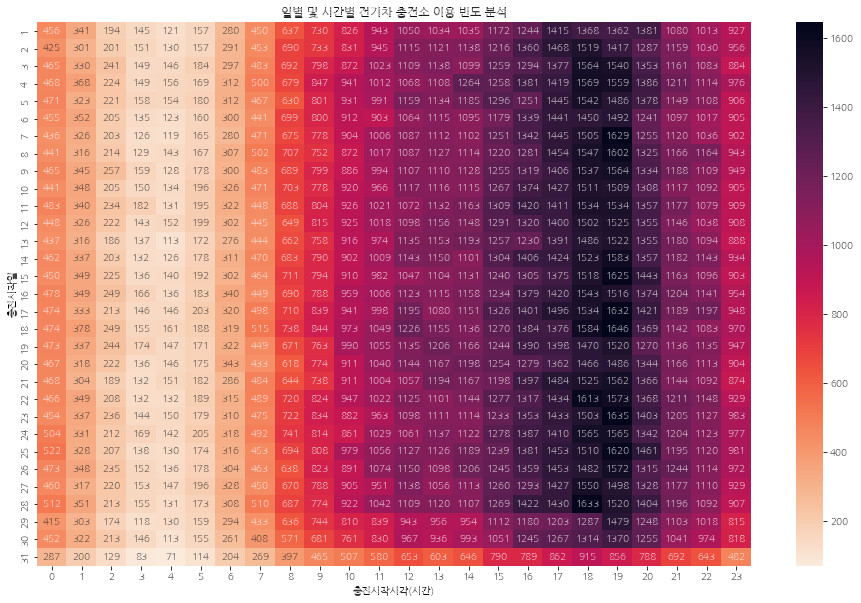

In [69]:
### 일 및 시간별 전기차 충전소 이용 빈도
df_pivot = df.pivot_table(values = '충전소명', index = '충전시작일', columns = '충전시작시각(시간)', aggfunc = 'count')
plt.figure(figsize = (16,10))
sns.heatmap(df_pivot, annot=True, fmt = ".0f", cmap = 'rocket_r')
plt.title('일별 및 시간별 전기차 충전소 이용 빈도 분석')
plt.show()

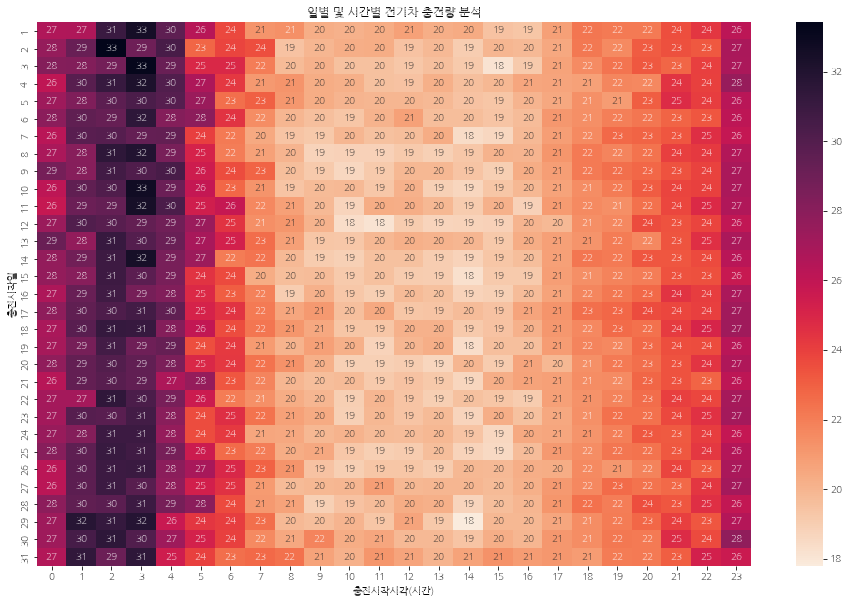

In [70]:
### 일 및 시간별 전기차 충전량
df_pivot = df.pivot_table(values = '충전량', index = '충전시작일', columns = '충전시작시각(시간)', aggfunc = 'mean')
plt.figure(figsize = (16,10))
sns.heatmap(df_pivot, annot=True, fmt = ".0f", cmap = 'rocket_r')
plt.title('일별 및 시간별 전기차 충전량 분석')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


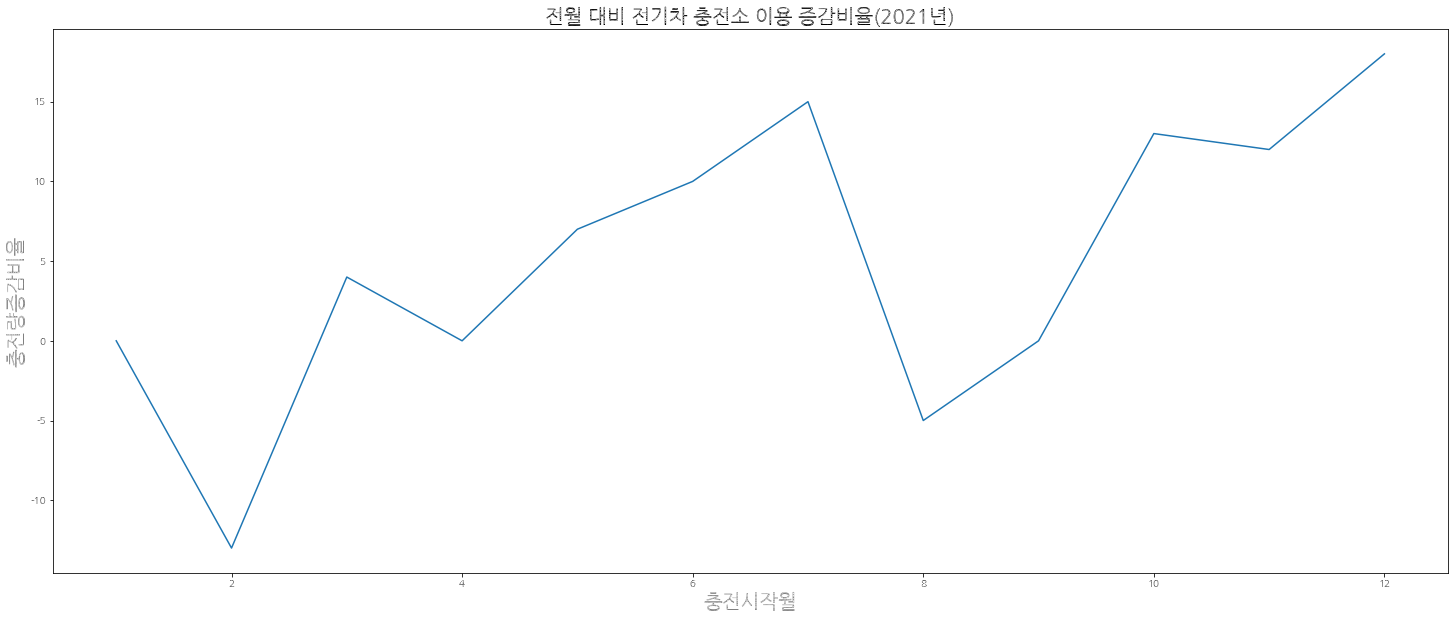

In [141]:
### 전월 대비 전기차 충전소 이용 증감비율(2021년)
df_lm = df[df['충전시작년도']==2021].groupby(['충전시작월'], as_index=False).sum()
df_lm['충전량증감비율'] = 0
for i in range(0,len(df_lm)-1):
  df_lm['충전량증감비율'][i+1] = (df_lm['충전량'][i+1]-df_lm['충전량'][i])/df_lm['충전량'][i]*100
df_lm
fig = plt.figure(figsize=(25,10))
plt.plot(df_lm['충전시작월'], df_lm['충전량증감비율'])
plt.ylabel('충전량증감비율', rotation=90, fontsize=20, color='gray')
plt.xlabel('충전시작월', fontsize=20, color='gray')
plt.title('전월 대비 전기차 충전소 이용 증감비율(2021년)', fontsize=20, color='black')
plt.show()

In [88]:
# 전기차충전소 충전량 평균을 기준으로 많은곳 적은곳 표시(샘플 200개 추출)
df_sample = df.sample(n=200)
bubble = folium.Map(
    location=[37.573050, 126.979189], 
    tiles='cartoDB positron',
    zoom_start=11)
mean = df_sample['충전량'].mean()

for idx in df_sample.index : 
  lat = df_sample.loc[idx, 'Latitude']
  lng = df_sample.loc[idx, 'Longitude']
  count = df_sample.loc[idx,'충전량']

  if count> mean :
    fillColor = 'red'
  else:
    fillColor='blue'

  folium.CircleMarker(
      location = [lat,lng],
      color='#FFFF00',
      fill_color = fillColor,
      fill_opacity = 0.7,
      weight=1.5,
      radius = count/2
  ).add_to(bubble)
bubble

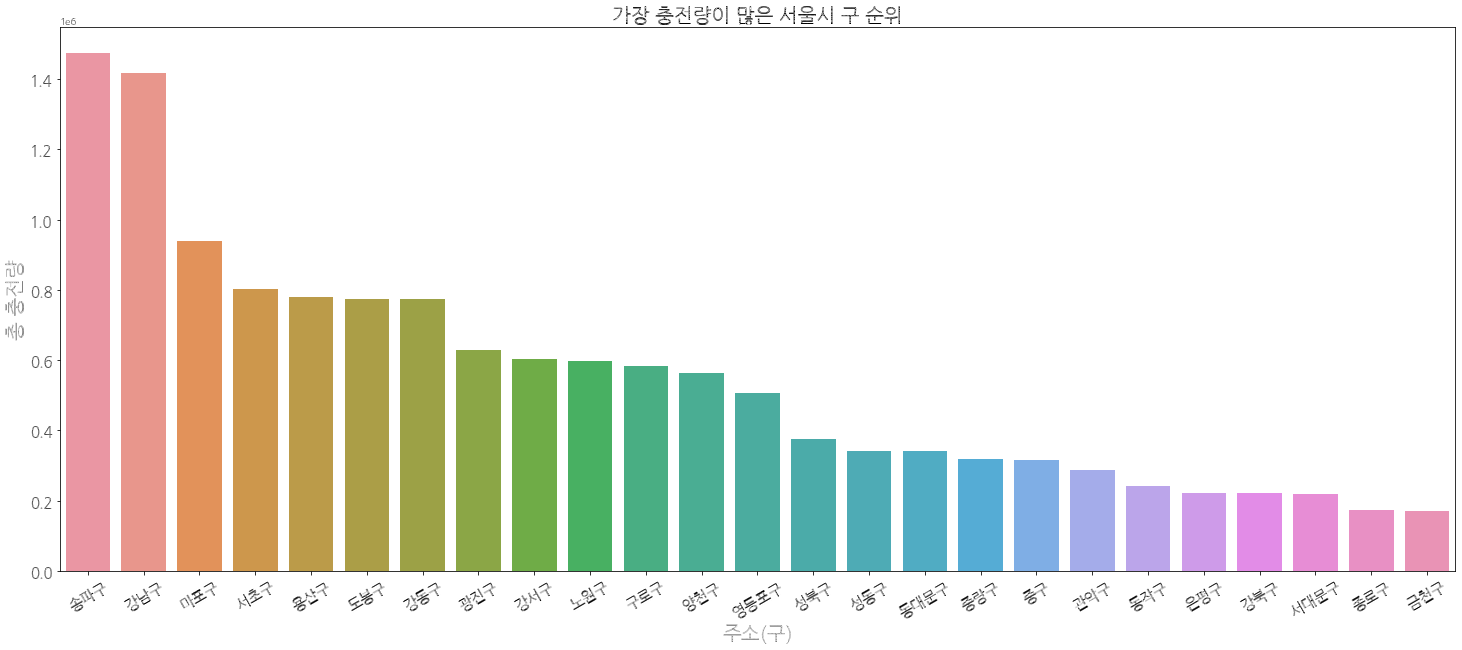

In [100]:
#  가장 충전량이 많은 서울시 구 순위
df_gu = df.groupby(['주소(구)'], as_index=False).sum().sort_values(by = '충전량', ascending=False).head(30)
fig = plt.figure(figsize=(25,10))
sns.barplot(x='주소(구)',y='충전량',data=df_gu)
plt.yticks(fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.ylabel('총 충전량', rotation=90, fontsize=20, color='gray')
plt.xlabel('주소(구)', fontsize=20, color='gray')
plt.title('가장 충전량이 많은 서울시 구 순위', fontsize=20, color='black')
plt.show()

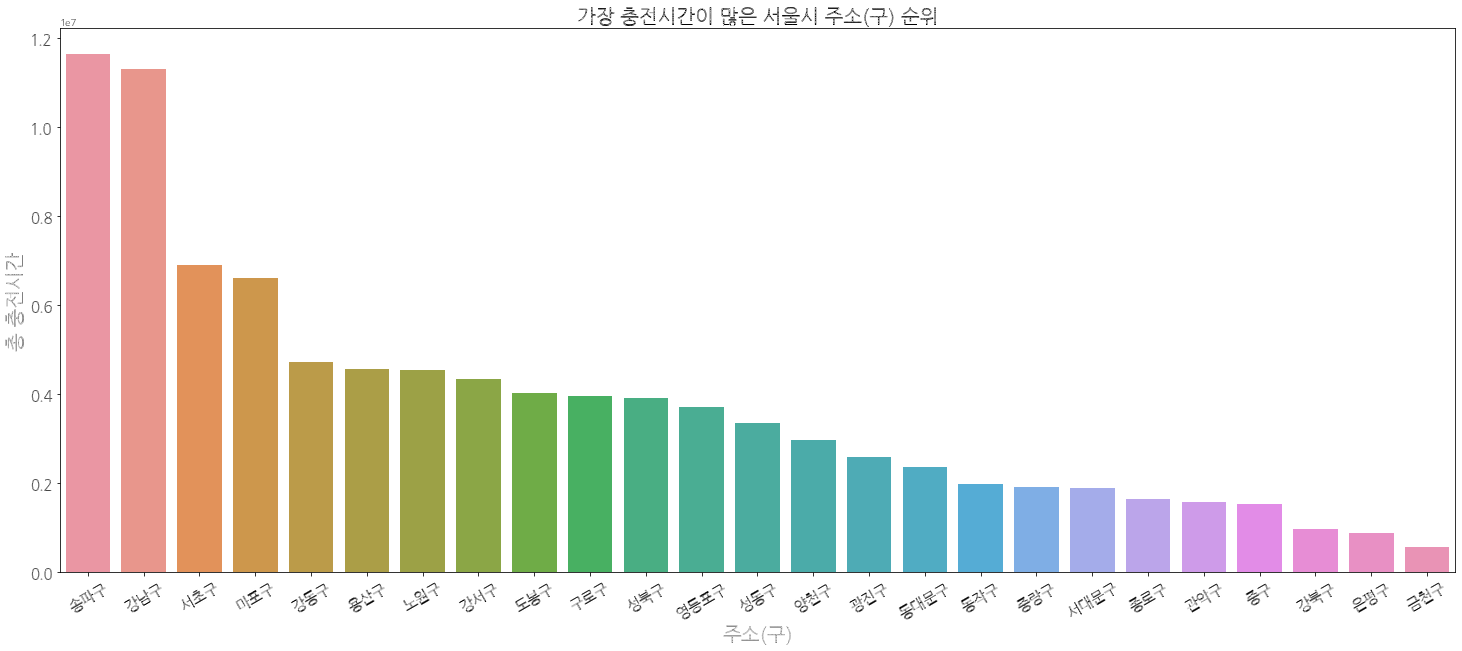

In [101]:
# 가장 충전시간이 많은 서울시 주소(구) 순위
df_gu = df.groupby(['주소(구)'], as_index=False).sum().sort_values(by = '총충전시간(분)', ascending=False).head(30)
fig = plt.figure(figsize=(25,10))
sns.barplot(x='주소(구)',y='총충전시간(분)',data=df_gu)
plt.yticks(fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.ylabel('총 충전시간', rotation=90, fontsize=20, color='gray')
plt.xlabel('주소(구)', fontsize=20, color='gray')
plt.title('가장 충전시간이 많은 서울시 주소(구) 순위', fontsize=20, color='black')
plt.show()

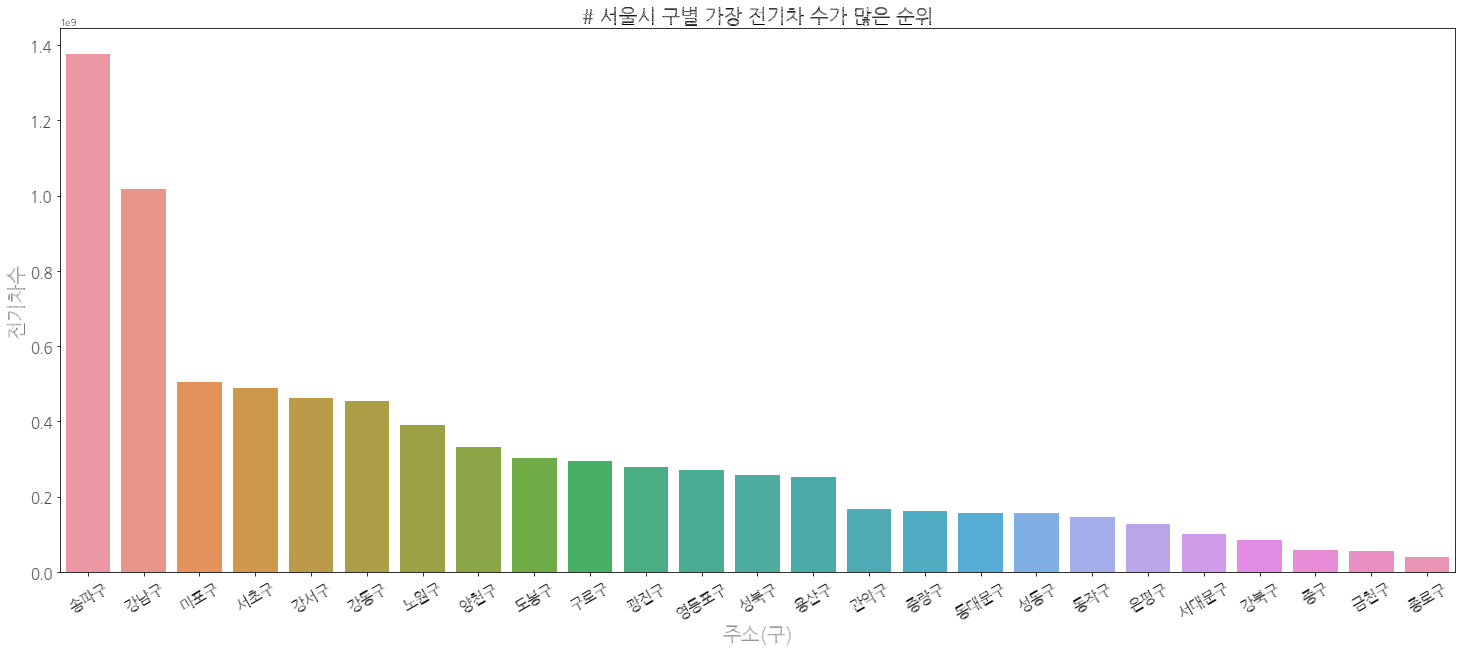

In [102]:
# 서울시 구별 가장 전기차 수가 많은 순위
df_gu = df.groupby(['주소(구)'], as_index=False).sum().sort_values(by = 'ele_num', ascending=False).head(30)
fig = plt.figure(figsize=(25,10))
sns.barplot(x='주소(구)',y='ele_num',data=df_gu)
plt.yticks(fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.ylabel('전기차수', rotation=90, fontsize=20, color='gray')
plt.xlabel('주소(구)', fontsize=20, color='gray')
plt.title('# 서울시 구별 가장 전기차 수가 많은 순위', fontsize=20, color='black')
plt.show()

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,Latitude,Longitude,총충전시간(분),충전시작년도,충전시작월,충전시작일,충전시작시각(시간),충전종료시각(시간),주소(구),vehicle,ele_num
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,37.517129,126.910236,0,2021,1,1,2,2,영등포구,188237.0,11295.0
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,37.517129,126.910236,29,2021,1,2,14,15,영등포구,188237.0,11295.0
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46,37.517129,126.910236,93,2021,1,2,20,22,영등포구,188237.0,11295.0
3,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,24.77,0,38,2021-01-04 12:12:02,2021-01-04 12:51:01,37.517129,126.910236,38,2021,1,4,12,12,영등포구,188237.0,11295.0
4,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,19.21,0,29,2021-01-04 22:51:11,2021-01-04 23:21:04,37.517129,126.910236,29,2021,1,4,22,23,영등포구,188237.0,11295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638694,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",50.0,17.00,0,51,2022-03-28 13:07:53,2022-03-28 13:59:48,37.608331,127.028785,51,2022,3,28,13,13,성북구,216671.0,13000.0
638695,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",50.0,16.70,0,27,2022-03-28 13:09:48,2022-03-28 13:37:47,37.608331,127.028785,27,2022,3,28,13,13,성북구,216671.0,13000.0
638696,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",50.0,18.70,0,38,2022-03-29 13:40:35,2022-03-29 14:18:47,37.608331,127.028785,38,2022,3,29,13,14,성북구,216671.0,13000.0
638697,급속,현대백화점 미아점,"서울특별시 성북구 동소문로 315 (길음동, 현대백화점미아점)",50.0,9.01,0,35,2022-03-31 20:14:52,2022-03-31 20:50:34,37.608331,127.028785,35,2022,3,31,20,20,성북구,216671.0,13000.0
